In [ ]:
# Ch04. Using Public Datasets with Tensorflow Datasets - 1

In [3]:
import urllib.request
import os
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import tensorflow_datasets as tfds
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [4]:
mnist_data = tfds.load("fashion_mnist")

for items in mnist_data:
    print(items)
# There is 'test' and 'train' splits.

Dataset fashion_mnist downloaded and prepared to C:\Users\dev\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.
train
test


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling fashion_mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling fashion_mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [5]:
mnist_train = tfds.load(name="fashion_mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(type(mnist_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


<class 'dict'>
dict_keys(['image', 'label'])
tf.Tensor(2, shape=(), dtype=int64)


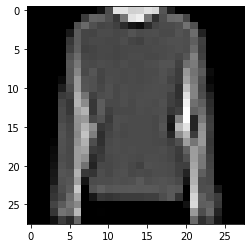

In [16]:
for item in mnist_train.take(1):
    print(type(item))
    print(item.keys())
    print(item['label'])
    plt.imshow(item['image'], cmap='gray')

In [14]:
mnist_test, info = tfds.load(name='fashion_mnist',with_info=True)
print(info)


tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='C:\\Users\\dev\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han X

In [23]:
(training_images, training_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load(name="fashion_mnist", split=['train', 'test'], batch_size= -1, as_supervised= True))

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [24]:
training_images = training_images /255.0
test_images = test_images /255.0

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [30]:
model.compile(optimizer = 'adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5276 - accuracy: 0.8139